<a href="https://colab.research.google.com/github/BohdanShepel2005/Mashynne-Navchannya/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%B7_%D0%9C%D0%9D_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [7]:
print("Завантаження CSV-файлу:")
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(next(iter(uploaded.values()))))

Завантаження CSV-файлу:


Saving housing.csv to housing (4).csv


In [8]:
# №1: Перші 5 рядків
print("\n№1 Перші 5 рядків:")
display(df.head())


№1 Перші 5 рядків:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# №2: Пропущені значення
print("\n№2 Пропущені значення:")
print(df.isnull().sum())

# Заповнюю пропуски середнім значенням для числових колонок
df.fillna(df.mean(numeric_only=True), inplace=True)




№2 Пропущені значення:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [10]:
# №3: Перевірка дублікатів
print("\n№3 Дублікати:")
print("Кількість дублікатів:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


№3 Дублікати:
Кількість дублікатів: 0


In [11]:
# №4: Перевірка типів даних
print("\n№4 Типи даних:")
print(df.dtypes)

# Перетворюємо нечислові дані у числові
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.mean(numeric_only=True), inplace=True)



№4 Типи даних:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object



№5 Кореляція з 'median_house_value':
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
ocean_proximity            NaN
Name: median_house_value, dtype: float64


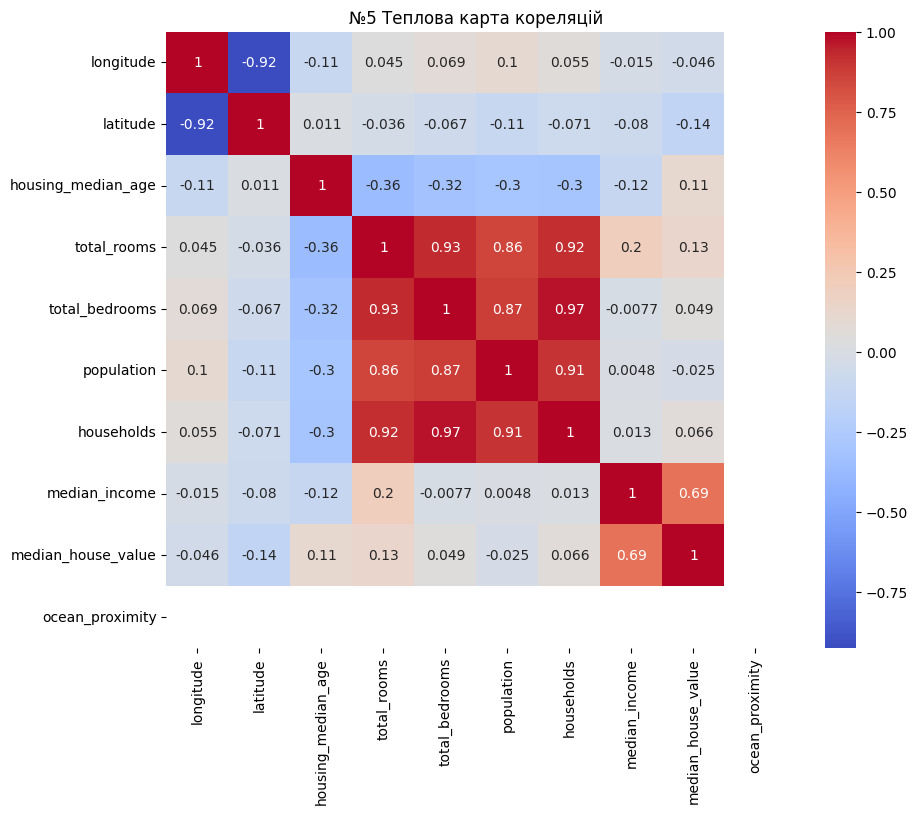

In [12]:
# №5: Кореляція з цільовою змінною
target_column = 'median_house_value' if 'median_house_value' in df.columns else df.columns[-1]
correlation = df.corr()[target_column].sort_values(ascending=False)

print(f"\n№5 Кореляція з '{target_column}':")
print(correlation)

# Теплова карта
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('№5 Теплова карта кореляцій')
plt.show()


In [13]:
# №6: Масштабування ознак
features = correlation.index[1:6]  # Топ-5 ознак
print("\n№6 Масштабування ознак")
print("Вибрані ознаки:", list(features))

X = df[features]
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



№6 Масштабування ознак
Вибрані ознаки: ['median_income', 'total_rooms', 'housing_median_age', 'households', 'total_bedrooms']


In [14]:
# №7: Поділ на тренувальні і тестові
print("\n№7 Поділ на вибірки")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")



№7 Поділ на вибірки
X_train: (16512, 5), X_test: (4128, 5)


In [15]:
# №8: Моделі
print("\n№8 Побудова моделей")

# Лінійна регресія
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Ridge + GridSearchCV
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)
print("Найкращий alpha для Ridge:", ridge_cv.best_params_['alpha'])


№8 Побудова моделей
Найкращий alpha для Ridge: 1


In [16]:
# №9: Метрики
print("\n№9 Метрики моделей:")

def print_metrics(y_true, y_pred, name):
    print(f"\n--- {name} ---")
    print("R²:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

print_metrics(y_test, y_pred_lr, "Лінійна регресія")
print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_ridge, "Ridge")


№9 Метрики моделей:

--- Лінійна регресія ---
R²: 0.5166865908482197
RMSE: 79582.55026428284

--- Random Forest ---
R²: 0.56672795128333
RMSE: 75350.0884312124

--- Ridge ---
R²: 0.5167749309787748
RMSE: 79575.27687394446


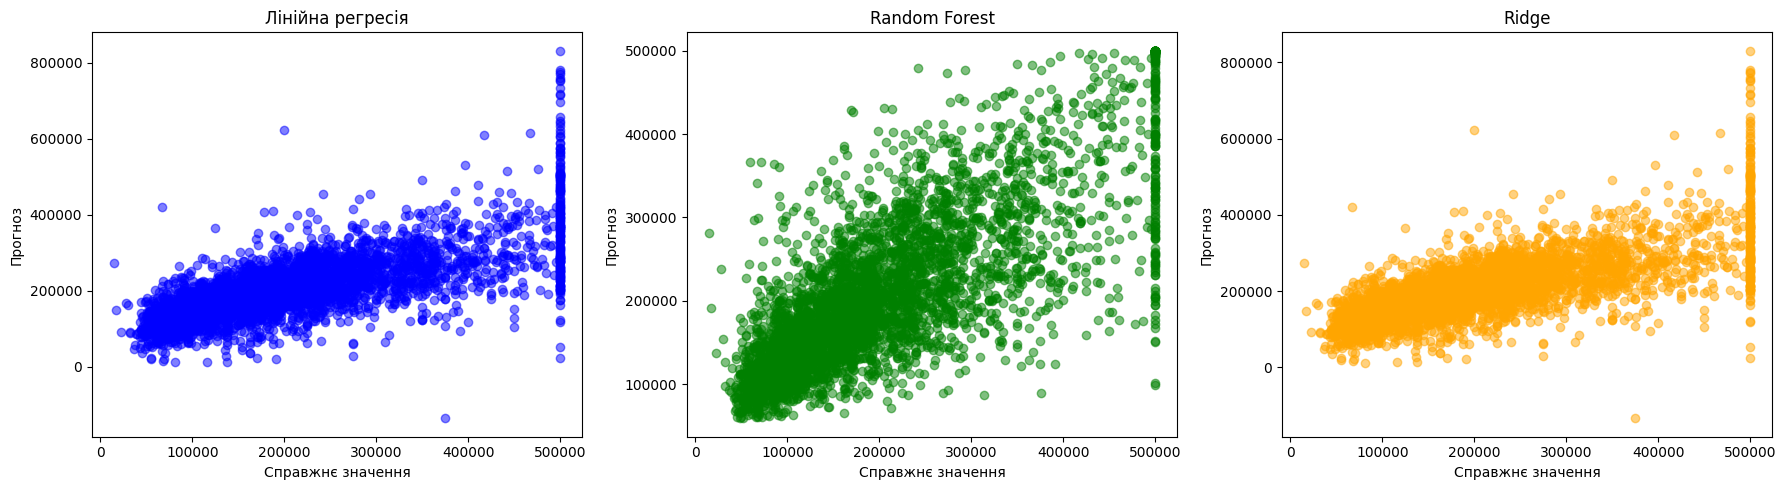

In [17]:
# №10: Графіки
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.title("Лінійна регресія")
plt.xlabel("Справжнє значення")
plt.ylabel("Прогноз")

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.title("Random Forest")
plt.xlabel("Справжнє значення")
plt.ylabel("Прогноз")

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='orange')
plt.title("Ridge")
plt.xlabel("Справжнє значення")
plt.ylabel("Прогноз")

plt.tight_layout()
plt.show()

In [18]:
# №11: Таблиця результатів
print("\n№11 Порівняння справжніх і прогнозованих значень:")
results = pd.DataFrame({
    'Справжнє': y_test.values,
    'Лін. регресія': y_pred_lr,
    'Random Forest': y_pred_rf,
    'Ridge': y_pred_ridge
})
display(results.head(10))


№11 Порівняння справжніх і прогнозованих значень:


,Справжнє,Лін. регресія,Random Forest,Ridge
0,47700.0,120115.319052,117740.00,120065.602841
1,45800.0,134908.908253,108578.00,134960.442627
2,500001.0,203028.671907,240584.05,203193.479733
3,218600.0,266179.130501,284354.05,266170.807423
4,278000.0,217221.522812,246882.14,217193.623019
5,158700.0,170434.231619,197668.00,170582.234339
6,198200.0,313882.894229,403768.33,313745.469823
7,157500.0,249623.537715,321935.13,249515.227909
8,340000.0,215036.039142,226582.00,215033.769876
9,446600.0,457375.570022,471677.59,457263.002131


from matplotlib import pyplot as plt
_df_0['Справжнє'].plot(kind='hist', bins=20, title='Справжнє')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Лін. регресія'].plot(kind='hist', bins=20, title='Лін. регресія')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Random Forest'].plot(kind='hist', bins=20, title='Random Forest')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Ridge'].plot(kind='hist', bins=20, title='Ridge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Справжнє', y='Лін. регресія', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Лін. регресія', y='Random Forest', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Random Forest', y='Ridge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Справжнє'].plot(kind='line', figsize=(8, 4), title='Справжнє')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Лін. регресія'].plot(kind='line', figsize=(8, 4), title='Лін. регресія')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Random Forest'].plot(kind='line', figsize=(8, 4), title='Random Forest')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Ridge'].plot(kind='line', figsize=(8, 4), title='Ridge')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
# №12: Висновки
print("\n№12 ВИСНОВКИ:")
print(f"""
 Я завантажив датасет та провів попередній аналіз даних.
Спочатку я завантажив CSV-файл про житлові умови, наступним кроком заповнюю пропущені значення середнім значенням для числових стовпців,
перевірив та видалив дублікати, потрібні колонки перевів в числовий формат.
Далі я зробив аналіз кореляцій між ознаками та цільовою змінною це для значення середнього будинку,
а потім створив теплову карту для візуалізації кореляцій між різними змінними. Наступним кроком я вибрав топ-5 найважливіших ознак,
що мають найбільшу кореляцію з цільовою змінною. Також проведено стандартизацію ознак з використанням StandardScaler.
Щоб побудувати моделі я взяв три алгоритми Лінійна регресія,Random Forest ,Ridge Regression. Я
 створив графіки щоб порівняти справжні та прогнозовані значення для кожної моделі.
""")


№12 ВИСНОВКИ:

 Я завантажив датасет та провів попередній аналіз даних.
Спочатку я завантажив CSV-файл про житлові умови, наступним кроком заповнюю пропущені значення середнім значенням для числових стовпців,
перевірив та видалив дублікати, потрібні колонки перевів в числовий формат. 
Далі я зробив аналіз кореляцій між ознаками та цільовою змінною це для значення середнього будинку, 
а потім створив теплову карту для візуалізації кореляцій між різними змінними. Наступним кроком я вибрав топ-5 найважливіших ознак, 
що мають найбільшу кореляцію з цільовою змінною. Також проведено стандартизацію ознак з використанням StandardScaler. 
Щоб побудувати моделі я взяв три алгоритми Лінійна регресія,Random Forest ,Ridge Regression. Я
 створив графіки щоб порівняти справжні та прогнозовані значення для кожної моделі.

